<a href="https://colab.research.google.com/github/icgranger9/cs-663_finalproject/blob/master/granger_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import tensorflow as tf

from google.colab import drive
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Connect to google drive.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Start loading data.
dir = "drive/My Drive/cs663_final/"  # Specific to my google drive
image_dir = dir + 'stage_1_test_images'

data = pd.read_csv(dir + 'tuning_labels.csv', header=None)

data[0] = data.iloc[:,0]+'.jpg'
data[1] = pd.Series(map(lambda x: x.split(), data.iloc[:,1]))
print(data)

                                0                                            1
0    2b2f44594449326f4e52553d.jpg                       [/m/06ts_6, /m/01g317]
1    2b333057383432514454593d.jpg  [/m/01g317, /m/06ts_6, /m/01jpn4, /m/0dnkv]
2    2b38364476612f6c4558383d.jpg                        [/m/01g317, /m/05zp8]
3    2b4270756237642b7456453d.jpg     [/m/0jjw, /m/015r61, /m/02csf, /m/05qdh]
4    2b4534307571444f412b4d3d.jpg                                   [/m/099fz]
..                            ...                                          ...
995  7a652f354f56304578364d3d.jpg              [/m/05s2s, /m/083vt, /m/03ljvf]
996  7a696a5a36356261572b6f3d.jpg                        [/m/0jyfg, /m/017ftj]
997  7a704375527150436248733d.jpg                                   [/m/07j7r]
998  7a752b505835372b496e633d.jpg                       [/m/012qyb, /m/01g317]
999  7a767a496f6175625649633d.jpg                [/m/0jjw, /m/02csf, /m/05qdh]

[1000 rows x 2 columns]


In [5]:
# Split Test and Train Data

train, test = train_test_split(data, test_size=0.2)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train_input = train.iloc[:,0]
test_input = test.iloc[:,0]
train_labels = train.iloc[:,1:]
test_labels = test.iloc[:,1:]

print(train_labels)

labels = []
for i, r in train_labels.iterrows():
  labels.extend(r[1])

labels = list(set(labels))

                                               1
0    [/m/0dnhy, /m/01g317, /m/017r8p, /m/01c8br]
1                         [/m/01f4td, /m/01g317]
2     [/m/0b9k6q, /m/04scj, /m/0frq6, /m/0g4q3r]
3                 [/m/018vs, /m/0342h, /m/04szw]
4                                     [/m/01yrx]
..                                           ...
795                        [/m/01c8br, /m/07j7r]
796            [/m/025s8bs, /m/0hhdb, /m/01g317]
797             [/m/07jdr, /m/01g317, /m/01vk9q]
798                      [/m/08t9c_, /m/0263lr1]
799                        [/m/02csf, /m/01g317]

[800 rows x 1 columns]


In [7]:
# Create 'generators', which essentially grab the images in real time, to reduce memory load

from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split=0.2)

train_generator = data_generator.flow_from_dataframe( dataframe=train,
                                                      directory=image_dir,
                                                      x_col=0,
                                                      y_col=1,
                                                      subset="training",
                                                      shuffle=True,
                                                      class_mode="categorical",
                                                      target_size=(128,128),
                                                      classes=labels,
                                                      batch_size=32)
                                                      
valid_generator = data_generator.flow_from_dataframe( dataframe=train,
                                                      directory=image_dir,
                                                      x_col=0,
                                                      y_col=1,
                                                      subset="validation",
                                                      shuffle=True,
                                                      class_mode="categorical",
                                                      target_size=(128,128),
                                                      classes=labels,
                                                      batch_size=32)

test_datagen=ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,)

test_generator = test_datagen.flow_from_dataframe( dataframe=test,
                                                      directory=image_dir,
                                                      x_col=0,
                                                      y_col=None,
                                                      shuffle=False,
                                                      class_mode=None,
                                                      target_size=(128,128),
                                                      batch_size=32)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 4 invalid image filename(s) in x_col="0". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 637 validated image filenames belonging to 438 classes.
Found 159 validated image filenames belonging to 438 classes.
Found 197 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 3 invalid image filename(s) in x_col="0". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [0]:
# Create a subclass of the keras model, with all the needed layers

class MyModel(Model):
  def __init__(self, num_labels):
    super(MyModel, self).__init__()

    self.conv0 = Conv2D(filters=56, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3))
    self.mp1 = MaxPooling2D(pool_size=(2, 2))
    self.conv1 = Conv2D(128, (3, 3), activation='relu')
    self.mp2 = MaxPooling2D(pool_size=(2, 2))
    self.conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')
    self.conv3 = Conv2D(256, (3, 3), activation='relu')
    self.mp3 = MaxPooling2D(pool_size=(2, 2))

    self.flatten = Flatten()
    self.den1 = Dense(2048, activation='relu')
    self.drop = Dropout(0.5)
    self.den2 = Dense(units=num_labels , activation = 'sigmoid')

  def call(self, x, training=False):
    x = self.conv0(x)
    x = self.mp1(x)
    x = self.conv1(x)
    x = self.mp2(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.mp3(x)

    x = self.flatten(x)
    x = self.den1(x)
    if training:
      x = self.drop(x)

    return self.den2(x)

# Create an instance of the model
model = MyModel(len(labels))


In [9]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.FalsePositives(), "accuracy"])


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=60)

Epoch 1/60
19/19 [==============================] - 327s 17s/step - loss: 13.3909 - false_positives: 36378.0000 - accuracy: 0.0444 - val_loss: 14.2078 - val_false_positives: 3556.0000 - val_accuracy: 0.0469
Epoch 2/60
19/19 [==============================] - 12s 636ms/step - loss: 13.2593 - false_positives: 14042.0000 - accuracy: 0.0281 - val_loss: 14.0348 - val_false_positives: 2785.0000 - val_accuracy: 0.0391
Epoch 3/60
19/19 [==============================] - 12s 636ms/step - loss: 13.1735 - false_positives: 12926.0000 - accuracy: 0.0463 - val_loss: 14.3018 - val_false_positives: 2680.0000 - val_accuracy: 0.0391
Epoch 4/60
19/19 [==============================] - 12s 632ms/step - loss: 13.1429 - false_positives: 12570.0000 - accuracy: 0.0298 - val_loss: 13.0509 - val_false_positives: 2674.0000 - val_accuracy: 0.0938
Epoch 5/60
19/19 [==============================] - 12s 635ms/step - loss: 13.5489 - false_positives: 11662.0000 - accuracy: 0.0364 - val_loss: 13.2398 - val_false_posit

In [21]:
print(history.history.keys())

dict_keys(['loss', 'false_positives', 'accuracy', 'val_loss', 'val_false_positives', 'val_accuracy'])


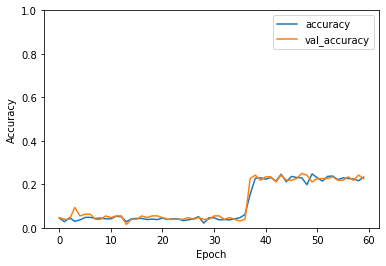

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper right')


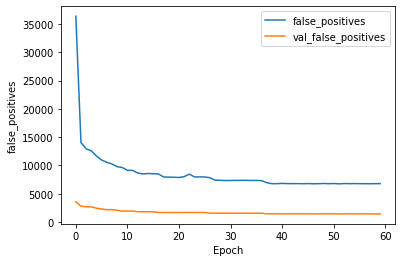

In [26]:
# Graph false positives

plt.plot(history.history['false_positives'], label='false_positives')
plt.plot(history.history['val_false_positives'], label = 'val_false_positives')
plt.xlabel('Epoch')
plt.ylabel('false_positives')
plt.legend(loc='upper right')

In [33]:
test_loss, test_acc = model.evaluate(test_generator)

print("Loss: {}".format(test_loss))
print("Acc: {}".format(test_acc))

   1088/Unknown - 572s 526ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

# Previous Work


Past attempts that didn't work. I don't want to delete it, in case I have to go back to it


In [13]:
# NOT WORKING CURRENTLY, GOING TO TRY SOMETHING ELSE
EPOCHS = 1

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()


  train_step(train_generator, labels)

  test_step(test_generator, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result() * 100))

AttributeError: ignored

In [0]:
# Create optimizer and loss objects

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


In [0]:
# Create train function

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
# Create test function

@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)